<h1>PROJET : ANALYSE DE DONNEES<br>
    AIRBNB NEW YORK</h1>
Christelle, Patricia et Jamal. décembre 2020

## Introduction

Ceci est une brève analyse des données des locations Airbnb à New York (NYC) en 2019. Les données proviennent de : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/.

In [1]:
#Importation des bibliothèques

import pandas as pd
import numpy as np
import scipy as sc
import matplotlib as mp
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from IPython.display import Image

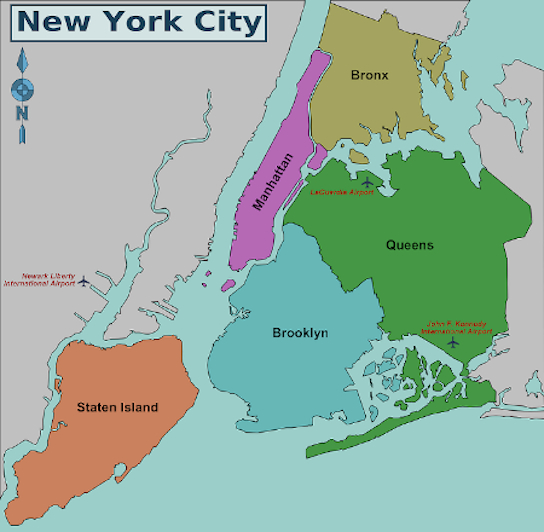

In [2]:
Image("nyc.jpg")

In [3]:
df = pd.read_csv('airbnb.csv')
df.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2539,2787,John,Brooklyn,Kensington,Private room,149,1,9,365
1,2595,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,355
2,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
3,5022,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0
4,5099,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,129


### Présence d'Airbnb dans les differents arrondissements

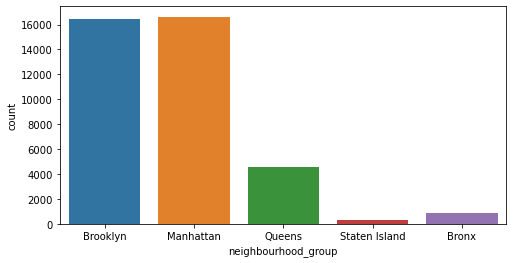

In [5]:
f,ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(df.neighbourhood_group)
plt.show()

### Relation entre le prix des locations et le type de chambre

Le graphique ci-dessous montre la répartition des prix par type de chambre. Il y a beaucoup de variation de prix dans chaque type de location. Dans l'ensemble, il semble que les «Maison / appartement entier» sont légèrement plus chères que les «Chambre privée», qui à leur tour sont plus chères queles «Chambre partagée». Cela a un sens intuitif.

#### Le prix des locations est motivé par le confort qu'offre celle ci

Text(0.5, 1.0, 'price of the room type')

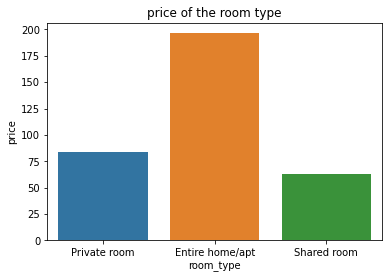

In [6]:
sns.barplot(x='room_type',y='price',data=df,ci=None)
plt.title('price of the room type')

#### Le nombre d'avis clients est relativement important pour les trois types de locations

Text(0.5, 1.0, "Nombre d'avis")

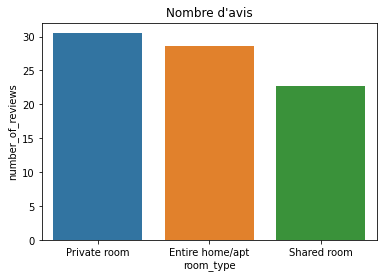

In [7]:
sns.barplot(x='room_type',y='number_of_reviews',data=df,ci=None)
plt.title("Nombre d'avis")

#### Quand à la disponiblité des locations sur l'année, les collocations proposent plus de nuitées que les autre types de logement

Text(0.5, 1.0, 'Disponibilité des locations')

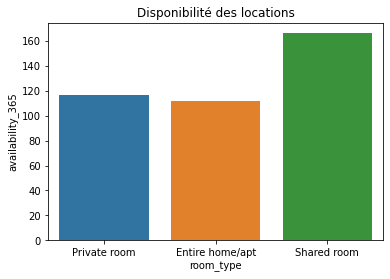

In [8]:
sns.barplot(x='room_type',y='availability_365',data=df,ci=None)
plt.title('Disponibilité des locations')

#### C'est à Manhatan que le prix des locations sont les plus élevés,suivi par Brookling et les Queens

Text(0.5, 1.0, 'Le prix des locations dans les différents arrondissements')

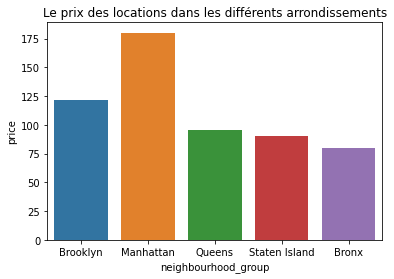

In [9]:
sns.barplot(x='neighbourhood_group',y='price',data=df,ci=None)
plt.title('Le prix des locations dans les différents arrondissements')

### Top 10 des secteurs les plus prisés

Voici la liste des 10 secteurs les plus populaires. Nombreuses sont les personnes qui aiment s'y installer. La raison de leur popularité peut dépendre de plusieurs critères, du prix de la location par exemple,des services de proximité ou encore de la sécurité dans les rues.

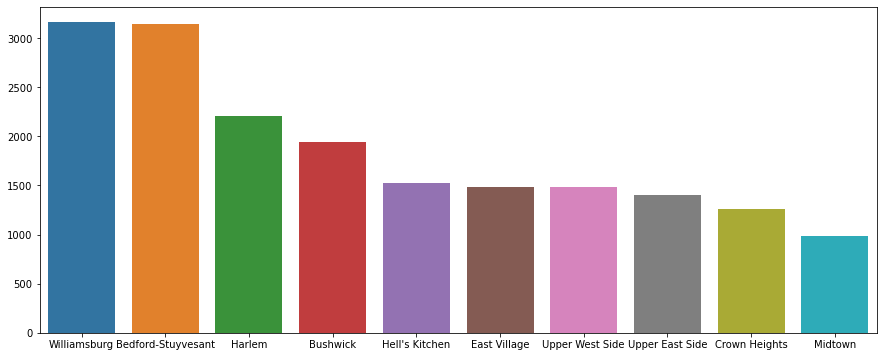

In [10]:
df1 = df.neighbourhood.value_counts()[:10]
f,ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x = df1.index,y=df1.values)
plt.show()

## Minimum de nuitées passées dans les différents types de locations

#### Pour les chambres individuelles
On voit que la pluspart des clients occupent la location moins d'une seimane. Une partie de la clientèle reste jusqu'à 30 jours

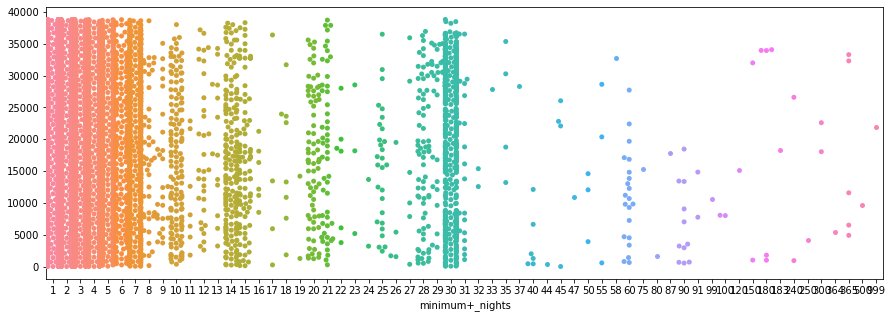

In [11]:
df1 = df[df.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum+_nights")
plt.show()

#### Pour les chambres partagées
La plupart des routards et des personnes à petit budget restent en moyenne 1 à 2 jours lors de leurs déplacements.

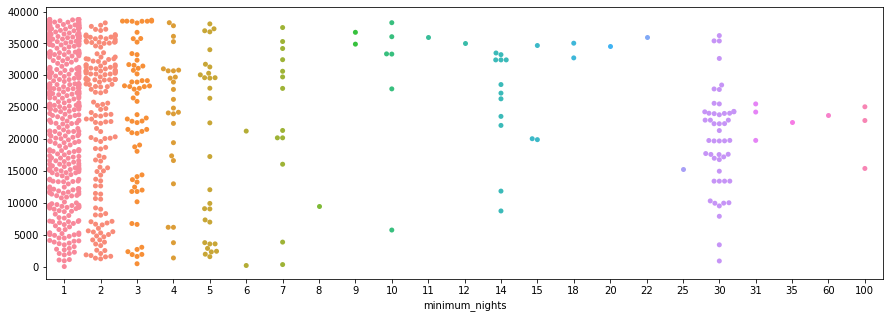

In [12]:
df1 = df[df.room_type=="Shared room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

#### Concernat les appartements et maisons en location
Les voyageurs préfèrent la location d'appartements et de maisons, car il y a moins de restrictions lorsqu'ils voyagent en famille ou entre amis. Ils peuvent préparer leurs propres repas s'ils le souhaitent.

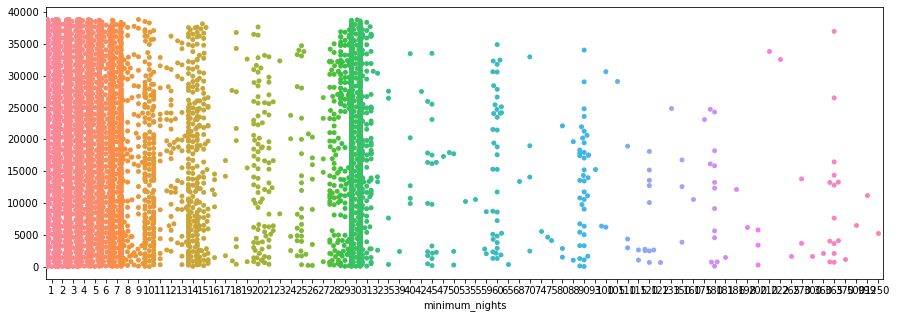

In [13]:
df1 = df[df.room_type=="Entire home/apt"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

## Conclusion

Il y a beaucoup de choses dans cet ensemble de données que nous pourrions encore explorer. Le type de chambre , l'emplacement ont un impact sur le prix et le nombre de nuitées réservées .